<a href="https://colab.research.google.com/github/kimsuujeong/AI-22.11.21/blob/main/Bigdata_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object       

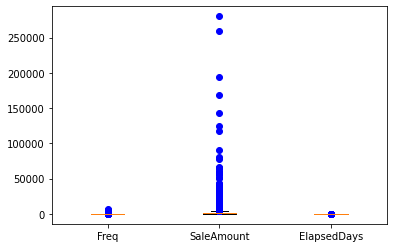

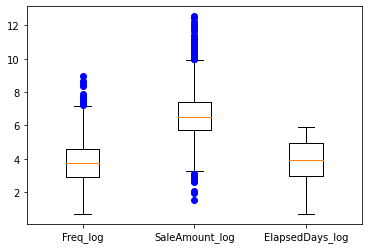

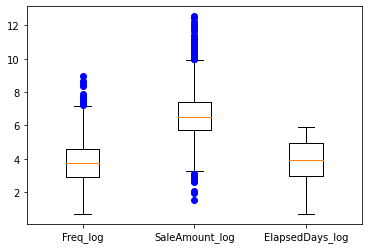

In [ ]:
import pandas as pd
import math
retail_df= pd.read_excel('Online Retail.xlsx')

#####################################################################################
########################### 데 이 터 탐 색 및 전 처 리###############################
#####################################################################################
retail_df.head() # 데이터 프레임의 앞 부분 보여줌
retail_df.info() # 데이터 프레임의 크기와 컬럼의 자료형 보임

#오류 데이터 정제
retail_df = retail_df[retail_df['Quantity']>0]
retail_df.info()
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df.info()
retail_df = retail_df[retail_df['CustomerID'].notnull()]
retail_df.info()

#'CustomerID' 자료형을 실수형에서 정수형으로 변환
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)
retail_df.info()
retail_df.head()

#Null인 행의 갯수 보여주기
print(retail_df.isnull().sum())
print(retail_df.shape) # 데이터 프레임의 행과 열

#중복 레코드 제거한 후 최종 레코드 수 확인
retail_df.drop_duplicates(inplace = True)
print(retail_df.shape) #작업 확인용 출력

pd.DataFrame([{'Product':len(retail_df['StockCode'].value_counts()),
               'Transaction':len(retail_df['InvoiceNo'].value_counts()), 'Customer':len(retail_df['CustomerID']. value_counts())}],
             columns = ['Product', 'Transaction', 'Customer'], index = ['counts'])

# Country 값의 개수를 계산하여 고객의 국적 빈도 확인
retail_df['Country'].value_counts()

# 제품 단가UnitPrice와 주문 개수Quantity를 곱하여 주문 금액SaleAmount을 계산하고 컬럼으로 추가
retail_df['SaleAmount'] = retail_df['UnitPrice']*retail_df['Quantity']
retail_df.head() #작업 확인용 출력

# 각 고객의 정보를 추출하기 위해 CustomerID를 기준으로 그룹을 만들고,
# 주문 횟수를 계산하기 위해 InvoiceNo의 개수를 구하고,
# 주문금액의 총액을 구하고,
# 주문일 중에서 가장 최근 날짜를 찾은 후 이를 새로운 데이터프레임 객체에 넣어 생성
aggregations = {'InvoiceNo':'count','SaleAmount':'sum','InvoiceDate':'max'}
customer_df= retail_df.groupby('CustomerID').agg(aggregations)
customer_df.head()
customer_df = customer_df.reset_index()
customer_df.head() #작업 확인용 출력


# customer_df의 컬럼 이름을 변경
customer_df = customer_df.rename(columns = {'InvoiceNo':'Freq'})
customer_df = customer_df.rename(columns = {'InvoiceDate':'ElapsedDays'})
customer_df.head() #작업 확인용 출력

# 2011.12. 10 기준으로 구매후 몇일이 지났는지에 대한 계산식 = 기준 날짜 - 마지막 구매일
import datetime
customer_df['ElapsedDays'] = datetime.datetime(2011,12,10) - customer_df['ElapsedDays']
customer_df.head() #작업 확인용 출력

# 마지막 구매 후 몇 일이 지났는지 날짜수 환산하여 ElapsedDays 값 구함
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days+1)
customer_df.head() #작업 확인용 출력

# customer_df의 3개 컬럼으로 박스플롯 3개를 그림
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq'], customer_df['SaleAmount'], customer_df['ElapsedDays']], sym = 'bo')
plt.xticks([1, 2, 3], ['Freq', 'SaleAmount','ElapsedDays'])
plt.show()

# 컬럼 값에 로그 함수log1p( )를 취한 값을 새 컬럼으로 추가하여 저장
import numpy as np
customer_df.head()
customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])
customer_df.head() #작업 확인용 출력

fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'], customer_df['ElapsedDays_log']], sym = 'bo')
plt.xticks([1, 2, 3], ['Freq_log', 'SaleAmount_log','ElapsedDays_log'])
plt.show()
customer_df

# 박스플롯을 그림
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'], customer_df['ElapsedDays_log']], sym = 'bo')
plt.xticks([1, 2, 3], ['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'])
plt.show()